# Data Visualization & Analysis on Tweets about accidents that happened in Egypt from 2014 to 2021
1. **Data Collection**: In This Notebook, I will use a Dataset which I scraped from Twitter, This Dataset contains (Date of Tweet, Tweets Content, UserName) 
2. **Dataset Cleaning**: 
    - At first, I'll remove stopwords, links, and Hashtags. 
    - Then I use word Stemming to avoid the same word misunderstanding
    - Then I remove duplicated Tweets, to guarantee the data is balanced
    - Finally, I save each Tweet as a list of words 
3. **Dataset Visualization**:
    - I showed the word cloud of all unique words to notice the most correlated words with Accidents in Egypt
    - I excluded top words to see what comes next in importance
    - I partitioned the whole Dataset to be a dataframe for each year, then showed the number of Tweets per year in a line plot and horizontal Bar.
    - I Showed the Most Accounts who Tweets about Accidents in Egypt.
    

- **Creator: <a href="https://www.linkedin.com/in/ahmed-samy-695398124/" target="_blank">Ahmed_Samy's Contant</a>**



In [4]:
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.download('punkt')
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk.sentiment.vader as vd
from nltk import download
from nltk.tokenize import word_tokenize
from matplotlib_venn import venn2
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import datetime

In [22]:
df = pd.read_csv("output.csv")
df=df.drop('Unnamed: 0',axis=1)
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_index()
df.set_index('Date',inplace=True)
df.head()
df.shape

(14570, 2)

# Start cleaning the text to be ready for processing

## 1. Removing spaces in Tweets text and converting all string to be in lowercase

In [34]:
import string 
df['Text'] =df['Text'].str.lower()

new_text =[]
for row in df['Text']:
    row = " ".join(row.split())
    new_text.append(row)

#saving the new edited text
df['Text']=new_text
df

,Text,User
Date,,
2022-01-31 15:29:12+00:00,doing better after accident thank you for aski...,Christy60901406
2022-01-31 07:27:47+00:00,31.1.1942 #80ww2 @cwgc air force: 1cotu hudson...,micktrade
2022-01-29 21:00:17+00:00,37 dead in egyptair ilyushin il-18d (su-aov) a...,AvglobeW
2022-01-29 14:16:37+00:00,"@cryborg a feline would put survival foremost,...",MelMan65
2022-01-28 21:05:20+00:00,the abominable dr phibes (1971) @talkingpicstv...,carinaberesford
...,...,...
2014-02-05 04:23:28+00:00,i'm always favoriting stuff by an accident 😩✋,_egypt_x33
2014-02-04 22:51:07+00:00,this is my new friend rabbani he has an injure...,Mazloom_TEHP
2014-02-03 16:48:18+00:00,i be favoriting stuff by an accident all the t...,_egypt_x33


#### Saving a copy of the new dataframe as a CSV file

In [5]:
df.to_csv('edited_accident.csv')

## 2. Removing retweets (If found) and Stopword

In [36]:
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)

In [37]:
df['Text'] = df['Text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])
df

,Text,User
Date,,
2022-01-31 15:29:12+00:00,"[better, accident, thank, asking, recovering, ...",Christy60901406
2022-01-31 07:27:47+00:00,"[31, 1, 1942, 80ww2, air, force, 1cotu, hudson...",micktrade
2022-01-29 21:00:17+00:00,"[37, dead, egyptair, ilyushin, il, 18d, su, ao...",AvglobeW
2022-01-29 14:16:37+00:00,"[feline, would, put, survival, foremost, metho...",MelMan65
2022-01-28 21:05:20+00:00,"[abominable, dr, phibes, 1971, presumed, dead,...",carinaberesford
...,...,...
2014-02-05 04:23:28+00:00,"[always, favoriting, stuff, accident]",_egypt_x33
2014-02-04 22:51:07+00:00,"[new, friend, rabbani, injured, leg, accident,...",Mazloom_TEHP
2014-02-03 16:48:18+00:00,"[favoriting, stuff, accident, time]",_egypt_x33


## 3. Words Stemming Process

In [38]:
ps = PorterStemmer()
df['Text'] = df['Text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [39]:
df

,Text,User
Date,,
2022-01-31 15:29:12+00:00,"[better, accid, thank, ask, recov, happilyever...",Christy60901406
2022-01-31 07:27:47+00:00,"[31, 1, 1942, 80ww2, air, forc, 1cotu, hudson,...",micktrade
2022-01-29 21:00:17+00:00,"[37, dead, egyptair, ilyushin, il, 18d, su, ao...",AvglobeW
2022-01-29 14:16:37+00:00,"[felin, would, put, surviv, foremost, method, ...",MelMan65
2022-01-28 21:05:20+00:00,"[abomin, dr, phibe, 1971, presum, dead, car, a...",carinaberesford
...,...,...
2014-02-05 04:23:28+00:00,"[alway, favorit, stuff, accid]",_egypt_x33
2014-02-04 22:51:07+00:00,"[new, friend, rabbani, injur, leg, accid, wait...",Mazloom_TEHP
2014-02-03 16:48:18+00:00,"[favorit, stuff, accid, time]",_egypt_x33


## 4. Make sure Deleting repeated Tweets to avoid the Data being Biased

In [40]:
df = df[~df.astype(str).duplicated()]
df

,Text,User
Date,,
2022-01-31 15:29:12+00:00,"[better, accid, thank, ask, recov, happilyever...",Christy60901406
2022-01-31 07:27:47+00:00,"[31, 1, 1942, 80ww2, air, forc, 1cotu, hudson,...",micktrade
2022-01-29 21:00:17+00:00,"[37, dead, egyptair, ilyushin, il, 18d, su, ao...",AvglobeW
2022-01-29 14:16:37+00:00,"[felin, would, put, surviv, foremost, method, ...",MelMan65
2022-01-28 21:05:20+00:00,"[abomin, dr, phibe, 1971, presum, dead, car, a...",carinaberesford
...,...,...
2014-02-07 10:11:09+00:00,"[dispatch, accid, long, point, rd, egypt, rd, ...",abc4traffic
2014-02-05 04:23:28+00:00,"[alway, favorit, stuff, accid]",_egypt_x33
2014-02-04 22:51:07+00:00,"[new, friend, rabbani, injur, leg, accid, wait...",Mazloom_TEHP


#  Data Visualization by wordcloud 

<ipython-input-41-fc37ba0c802d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['liststring'] = [','.join(map(str, l)) for l in df['Text']]


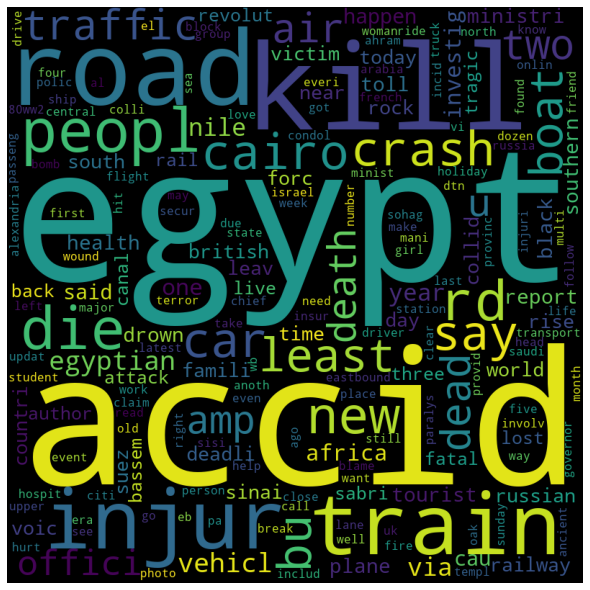

In [41]:
#convert lists into string
df['liststring'] = [','.join(map(str, l)) for l in df['Text']]

listRows = df.liststring
text = ""
for row in listRows:
    text = text + " " + row
    
wordcloud = WordCloud(width = 800, height = 800,collocations=False , background_color ='black',min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Here i Excluded Some very obvious Words to show other important ones

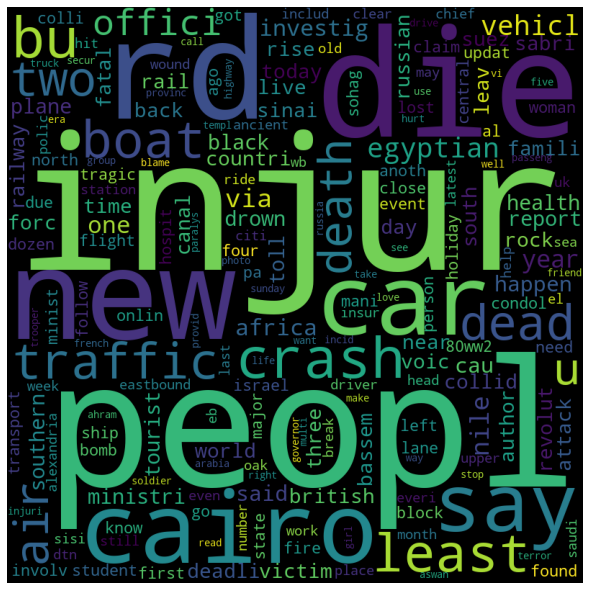

In [42]:
stopwords = {'egypt', 'accid', 'kill', 'road', 'people', 'train', 'amp'}
result = [word for word in re.split("\W+",text) if word.lower() not in stopwords]
type(result)

text = "" 
for ele in result:
    text = text + " " + ele

wordcloud = WordCloud(width = 800, height = 800,collocations=False , background_color ='black',min_font_size = 10).generate(text) 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### -  There are Other words that appeared to be important like Cairo,injury,Dead, Traffic, Crash and many other expressing words

# Trying a Sentiment Analyser (Still Not helpful till now)

In [44]:
sia = vd.SentimentIntensityAnalyzer()
df['Sentimented_Text'] = df['Text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )
df

<ipython-input-44-4f0ae5acedc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentimented_Text'] = df['Text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )


,Text,User,liststring,Sentimented_Text
Date,,,,
2022-01-31 15:29:12+00:00,"[better, accid, thank, ask, recov, happilyever...",Christy60901406,"better,accid,thank,ask,recov,happilyeveraft,st...",0.8016
2022-01-31 07:27:47+00:00,"[31, 1, 1942, 80ww2, air, forc, 1cotu, hudson,...",micktrade,"31,1,1942,80ww2,air,forc,1cotu,hudson,2,accid,...",-0.5423
2022-01-29 21:00:17+00:00,"[37, dead, egyptair, ilyushin, il, 18d, su, ao...",AvglobeW,"37,dead,egyptair,ilyushin,il,18d,su,aov,accid,...",-1.0505
2022-01-29 14:16:37+00:00,"[felin, would, put, surviv, foremost, method, ...",MelMan65,"felin,would,put,surviv,foremost,method,ensur,w...",0.6142
2022-01-28 21:05:20+00:00,"[abomin, dr, phibe, 1971, presum, dead, car, a...",carinaberesford,"abomin,dr,phibe,1971,presum,dead,car,accid,dis...",-1.6794
...,...,...,...,...
2014-02-07 10:11:09+00:00,"[dispatch, accid, long, point, rd, egypt, rd, ...",abc4traffic,"dispatch,accid,long,point,rd,egypt,rd,mount,pl...",0.5106
2014-02-05 04:23:28+00:00,"[alway, favorit, stuff, accid]",_egypt_x33,"alway,favorit,stuff,accid",0.0000
2014-02-04 22:51:07+00:00,"[new, friend, rabbani, injur, leg, accid, wait...",Mazloom_TEHP,"new,friend,rabbani,injur,leg,accid,wait,x,ray,...",0.4939


# Showing a Very important Numbers That gives us many Insights 

## 1. Number of Words in this Dataset

In [45]:
new_text =[]
for row in df['liststring']:
    row = " ".join(row.split())
    new_text.append(row)
new_text=" ".join(new_text)
new_text = new_text.replace(',',' ')

count_words = len(new_text)
print('This dataset contain : ',count_words,'Words')

This dataset contain :  986586 Words


## 2. Number of the most mentioned words in all of the Tweets from (2014 : 2022)

In [54]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
            
    counts=dict(sorted(counts.items(), key=lambda item: item[1] , reverse=True))
    first20vals = list(counts.items())[:20]
    return first20vals

Most20Mentioned =word_count(new_text)

Most_Mentioned = dict(Most20Mentioned)

Repetitions_df = pd.DataFrame(Most_Mentioned.items(), columns=["Word", "Repetitions Number"]) 
Repetitions_df

,Word,Repetitions Number
0,egypt,13688
1,accid,13311
2,kill,3710
3,road,2699
4,train,1706
5,injur,1581
6,peopl,1429
7,die,1329
8,rd,1155
9,cairo,918


## 3. Partitioning the main dataframe by years trying to show differences for year to another

### 3.1 The partitioning process

In [58]:
start_date = '2014-02-01 20:17:28+00:00'
end_date = '2015-01-01 15:29:12+00:00'
df_2014 = df.loc[end_date:start_date]

start_date = '2015-02-01 20:17:28+00:00'
end_date = '2016-01-01 15:29:12+00:00'
df_2015 = df.loc[end_date:start_date]

start_date = '2016-02-01 20:17:28+00:00'
end_date = '2017-01-01 15:29:12+00:00'
df_2016 = df.loc[end_date:start_date]

start_date = '2017-02-01 20:17:28+00:00'
end_date = '2018-01-01 15:29:12+00:00'
df_2017 = df.loc[end_date:start_date]

start_date = '2018-02-01 20:17:28+00:00'
end_date = '2019-01-01 15:29:12+00:00'
df_2018 = df.loc[end_date:start_date]

start_date = '2019-02-01 20:17:28+00:00'
end_date = '2020-01-01 15:29:12+00:00'
df_2019 = df.loc[end_date:start_date]

start_date = '2020-02-01 20:17:28+00:00'
end_date = '2021-01-01 15:29:12+00:00'
df_2020 = df.loc[end_date:start_date]

start_date = '2021-02-01 20:17:28+00:00'
end_date = '2022-01-01 15:29:12+00:00'
df_2021 = df.loc[end_date:start_date]

### 3.2 Number of Tweets per Year to see how much Tweets are biased

Tweets_in_DataFrame 0 are : 2683
Tweets_in_DataFrame 1 are : 2260
Tweets_in_DataFrame 2 are : 1720
Tweets_in_DataFrame 3 are : 851
Tweets_in_DataFrame 4 are : 798
Tweets_in_DataFrame 5 are : 1085
Tweets_in_DataFrame 6 are : 625
Tweets_in_DataFrame 7 are : 1910


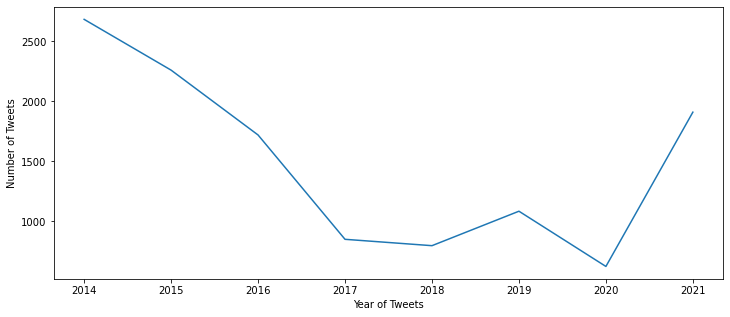

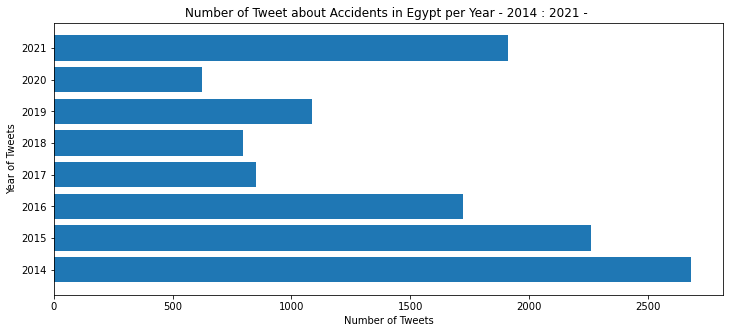

In [105]:
Years_list = [df_2014 , df_2015 , df_2016 , df_2017 , df_2018 , df_2019 , df_2020 , df_2021]
num_list=[]
for iter,i in enumerate(Years_list): 
    num_list.append(i.shape[0])
    print("Tweets_in_DataFrame %s"% iter, "are :",i.shape[0])

STR_list = ['2014' , '2015' , '2016' , '2017' , '2018' , '2019' , '2020' , '2021']
years_dict = dict(zip(STR_list, num_list))    
myList = years_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.figure(figsize=(12,5))
plt.plot(x, y)
plt.title("The intensity of tweets about accidents in Egypt from 2014 to 2021")
plt.xlabel('Year of Tweets')
plt.ylabel('Number of Tweets')
plt.show()

plt.figure(figsize=(12,5))
plt.barh(x, y)
plt.title("Number of Tweet about Accidents in Egypt per Year - 2014 : 2021 - ")
plt.ylabel("Year of Tweets")
plt.xlabel("Number of Tweets")
plt.show()

### Most Tweets contain the words: (Accident & Egypt) where in 2014 and least Tweets where in 2021 but this is Not a strong indicator means that 2014 Was a disastrous year for the number of accidents in Egypt, So I will keep Searching for a good explanation of this phenomenon

# Choose from years DataFrames to show most Frequent words in a specific year 



In [119]:
# ---->[df_2014 , df_2015 , df_2016 , df_2017 , df_2018 , df_2019 , df_2020 , df_2021]

# just Change the DataFrame Name in the next for loop to be one of the above DataFrames to show the year's result 
new_text =[]
for row in df_2018['liststring']:
    row = " ".join(row.split())
    new_text.append(row)
new_text=" ".join(new_text)
new_text = new_text.replace(',',' ')

count_words = len(new_text)
print('This dataset contain : ',count_words,'Words')

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
            
    counts=dict(sorted(counts.items(), key=lambda item: item[1] , reverse=True))
    first20vals = list(counts.items())[:20]
    #first20vals = {k: counts[k] for k in sorted(counts.keys())[:20]}
    return first20vals

Most20Mentioned =word_count(new_text)

Most_Mentioned = dict(Most20Mentioned)

Repetitions_df = pd.DataFrame(Most_Mentioned.items(), columns=["Word", "Repetitions Number"]) 
Repetitions_df.head(10)

This dataset contain :  70124 Words


,Word,Repetitions Number
0,egypt,850
1,accid,817
2,kill,206
3,die,135
4,road,118
5,train,108
6,boat,97
7,banana,97
8,british,84
9,say,82


# Most Account talked about Accidents in Egypt on Twitter

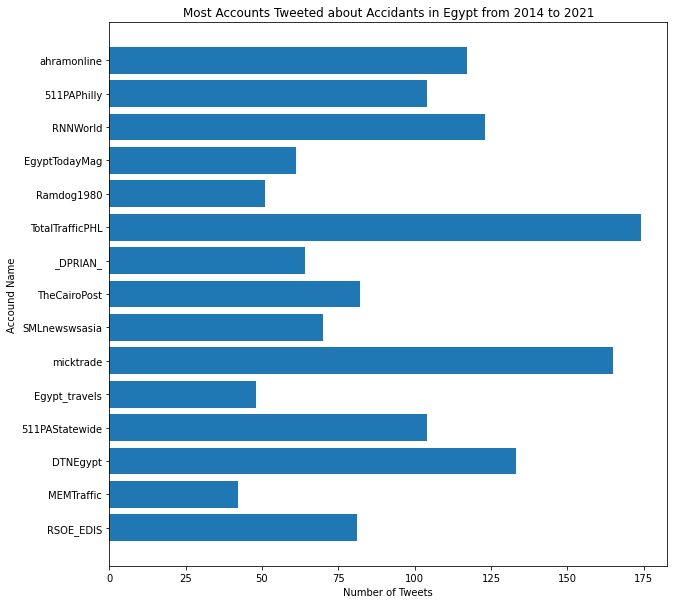

In [147]:
most_Freq_Users = df['User'].value_counts()
User_freq = pd.DataFrame(most_Freq_Users)
User_freq.reset_index(inplace=True)
User_freq = User_freq.rename(columns = {'index': 'UserName', 'User': 'Number of Tweets'}, inplace = False)
visual_users = (User_freq.head(15)).sample(frac=1)

plt.figure(figsize=(10,10))
plt.barh(visual_users['UserName'],visual_users['Number of Tweets'])
plt.title("Most Accounts Tweeted about Accidants in Egypt from 2014 to 2021")
plt.ylabel("Accound Name")
plt.xlabel("Number of Tweets")
plt.show()